In [2]:
import scipy.io as sio
import numpy as np
import datetime
import matplotlib.pyplot as plt
import  matplotlib.cm as cm
%matplotlib inline

import sys
sys.path.append('/ocean/imachuca/Canyons/mackenzie_canyon/bathymetry/modules/')
import functions_plot

In [13]:
ts_data = sio.loadmat('canyonTSdata.mat')
longitude = ts_data['loncanyon'][0]
latitude = ts_data['latcanyon'][0]
year = ts_data['yrcanyon'][0]
day = ts_data['daycanyon'][0]
con_temp = ts_data['tempcanyon']
abs_salt = ts_data['salcanyon']
depth = ts_data['depthcanyon']

dates = []
for i in range(len(day)):
    date = (datetime.datetime(year[i], 1, 1) + datetime.timedelta(day[i] - 1)).strftime('%m-%d-%y')
    dates.append(date)

In [155]:
xg, yg, zg = functions_plot.get_variables('G')
xn, yn, zn = functions_plot.def_regionG(-140, -136.0, 69.0, 71.0)

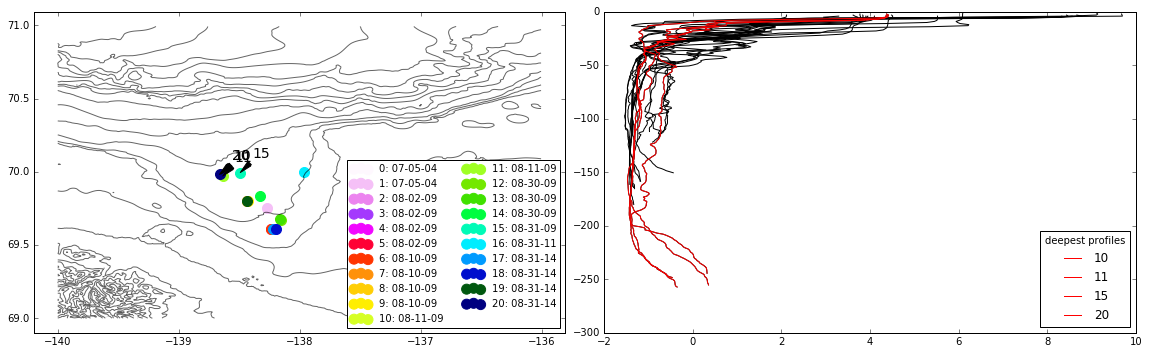

In [255]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16,5)); plt.tight_layout()
fig, ax1 = functions_plot.plot_region(fig, ax1, xn, yn, zn)
c = cm.gist_ncar_r(np.linspace(0, 1, len(day)))
for i in range(len(longitude)):
    ax1.scatter(longitude[i], latitude[i], color=c[i], label = str(i) + ': ' + dates[i], s=100)
ax1.legend(ncol = 2, fontsize=10, loc=4)

ax2.plot(con_temp, depth, 'k')
for j in zip([10, 11, 15, 20]):
    ax1.annotate(str(j[0]), xy=(longitude[j], latitude[j]), 
                 xytext=(longitude[j]+0.1, latitude[j]+0.1), 
                 arrowprops=dict(facecolor='black', headwidth=5), fontsize=14)
    ax2.plot(con_temp[:,j], depth[:,j], 'r', label=str(j[0]))
ax2.legend(title='deepest profiles', loc=4)
plt.show()

